In [39]:
import os
import pandas as pd 
import seaborn as sns

In [40]:
# this notebook does not backtest any particular strategy, 
# it is just for data exploration

symbol = "BTCUSD"
# Get the list of all files and directories
path = "/Users/ahmetsalih/PycharmProjects/interest_calc/"+symbol
dir_list = os.listdir(path)
print("Files and directories in '", path, "' :")
# prints all files
print(dir_list)


Files and directories in ' /Users/ahmetsalih/PycharmProjects/interest_calc/BTCUSD ' :
['BTCUSD_PERP-1m-2024-04.csv', 'BTCUSD_PERP-1m-2024-05.csv', 'BTCUSD_PERP-fundingRate-2024-04.csv', 'BTCUSD_PERP-fundingRate-2024-05.csv', 'BTCUSD_PERP-fundingRate-2024-01.csv', 'BTCUSD_PERP-fundingRate-2023-08.csv', 'BTCUSD_240329-1m-2023-11.csv', 'BTCUSD_PERP-1m-2024-02.csv', '.DS_Store', 'BTCUSD_PERP-1m-2024-03.csv', 'BTCUSD_240329-1m-2023-10.csv', 'BTCUSD_PERP-fundingRate-2023-09.csv', 'BTCUSD_240329-1m-2023-12.csv', 'BTCUSD_PERP-fundingRate-2024-02.csv', 'BTCUSD_PERP-1m-2024-01.csv', 'BTCUSD_PERP-1m-2023-08.csv', 'BTCUSD_PERP-1m-2023-09.csv', 'BTCUSD_PERP-fundingRate-2024-03.csv', 'BTCUSD_240628-1m-2023-12.csv', 'BTCUSD_240628-1m-2024-02.csv', 'BTCUSD_240628-1m-2024-03.csv', 'BTCUSD_240628-1m-2024-01.csv', 'BTCUSD_240628-1m-2024-04.csv', 'BTCUSD_240628-1m-2024-05.csv', 'BTCUSD_PERP-fundingRate-2023-07.csv', 'BTCUSD_240329-1m-2024-03.csv', 'BTCUSD_PERP-1m-2023-10.csv', 'BTCUSD_PERP-1m-2023-11.csv'

In [41]:
delivery_dates = ["240329", "240628"]
funding_rate_files = []
delivery_files = {del_date:[] for del_date in delivery_dates}
perpetual_files = []

for file_name in dir_list:
    file_path = path + "/" + file_name
    if(file_name.split("-")[0] in [symbol, symbol+"_PERP"]):
        if(file_name.split("-")[1] == "fundingRate"):
            funding_rate_files.append(path + "/" + file_name)
        else:
            perpetual_files.append(path + "/" + file_name)
    else:
        del_name = file_name.split("-")[0]
        del_date = del_name.split("_")[1]
        if(del_name.split("_")[0] != symbol):continue
        delivery_files[del_date].append(path + "/" + file_name)
perpetual_files
    

['/Users/ahmetsalih/PycharmProjects/interest_calc/BTCUSD/BTCUSD_PERP-1m-2024-04.csv',
 '/Users/ahmetsalih/PycharmProjects/interest_calc/BTCUSD/BTCUSD_PERP-1m-2024-05.csv',
 '/Users/ahmetsalih/PycharmProjects/interest_calc/BTCUSD/BTCUSD_PERP-1m-2024-02.csv',
 '/Users/ahmetsalih/PycharmProjects/interest_calc/BTCUSD/BTCUSD_PERP-1m-2024-03.csv',
 '/Users/ahmetsalih/PycharmProjects/interest_calc/BTCUSD/BTCUSD_PERP-1m-2024-01.csv',
 '/Users/ahmetsalih/PycharmProjects/interest_calc/BTCUSD/BTCUSD_PERP-1m-2023-08.csv',
 '/Users/ahmetsalih/PycharmProjects/interest_calc/BTCUSD/BTCUSD_PERP-1m-2023-09.csv',
 '/Users/ahmetsalih/PycharmProjects/interest_calc/BTCUSD/BTCUSD_PERP-1m-2023-10.csv',
 '/Users/ahmetsalih/PycharmProjects/interest_calc/BTCUSD/BTCUSD_PERP-1m-2023-11.csv',
 '/Users/ahmetsalih/PycharmProjects/interest_calc/BTCUSD/BTCUSD_PERP-1m-2023-07.csv',
 '/Users/ahmetsalih/PycharmProjects/interest_calc/BTCUSD/BTCUSD_PERP-1m-2023-06.csv',
 '/Users/ahmetsalih/PycharmProjects/interest_calc/BTCU

In [42]:
perpetual_data = pd.concat(map(pd.read_csv, perpetual_files))
perpetual_data = perpetual_data.sort_values(by=['open_time'])
delivery_data = {del_date:[] for del_date in delivery_dates}

for del_date in delivery_files:
    delivery_data[del_date] = pd.concat(map(pd.read_csv, delivery_files[del_date]))
    delivery_data[del_date] = delivery_data[del_date].sort_values(by=['open_time'])
funding_rate_data = pd.concat(map(pd.read_csv, funding_rate_files))
funding_rate_data = funding_rate_data.sort_values(by=['calc_time'])
funding_rate_data = funding_rate_data.drop_duplicates(subset=['calc_time'])


#delivery data
int_corr = []
cumulative_interest = []
mult = 1
for index, row in funding_rate_data.iterrows():
    annual_rate = (row["last_funding_rate"] * (365*3))
    mult = mult + (row["last_funding_rate"])
    
    annual_rate *= 100
    
    int_corr.append(annual_rate)
    cumulative_interest.append((mult-1)*100)
funding_rate_data.insert(0, "Yearly Interest", int_corr)
funding_rate_data.insert(0, "Cumulative Interest", cumulative_interest)
sns.set(rc={"figure.figsize":(35, 10)})

[Text(0.5, 1.0, '2023-6 to 2024-6 BTCUSD fundıng rates multiplied to annual rate')]

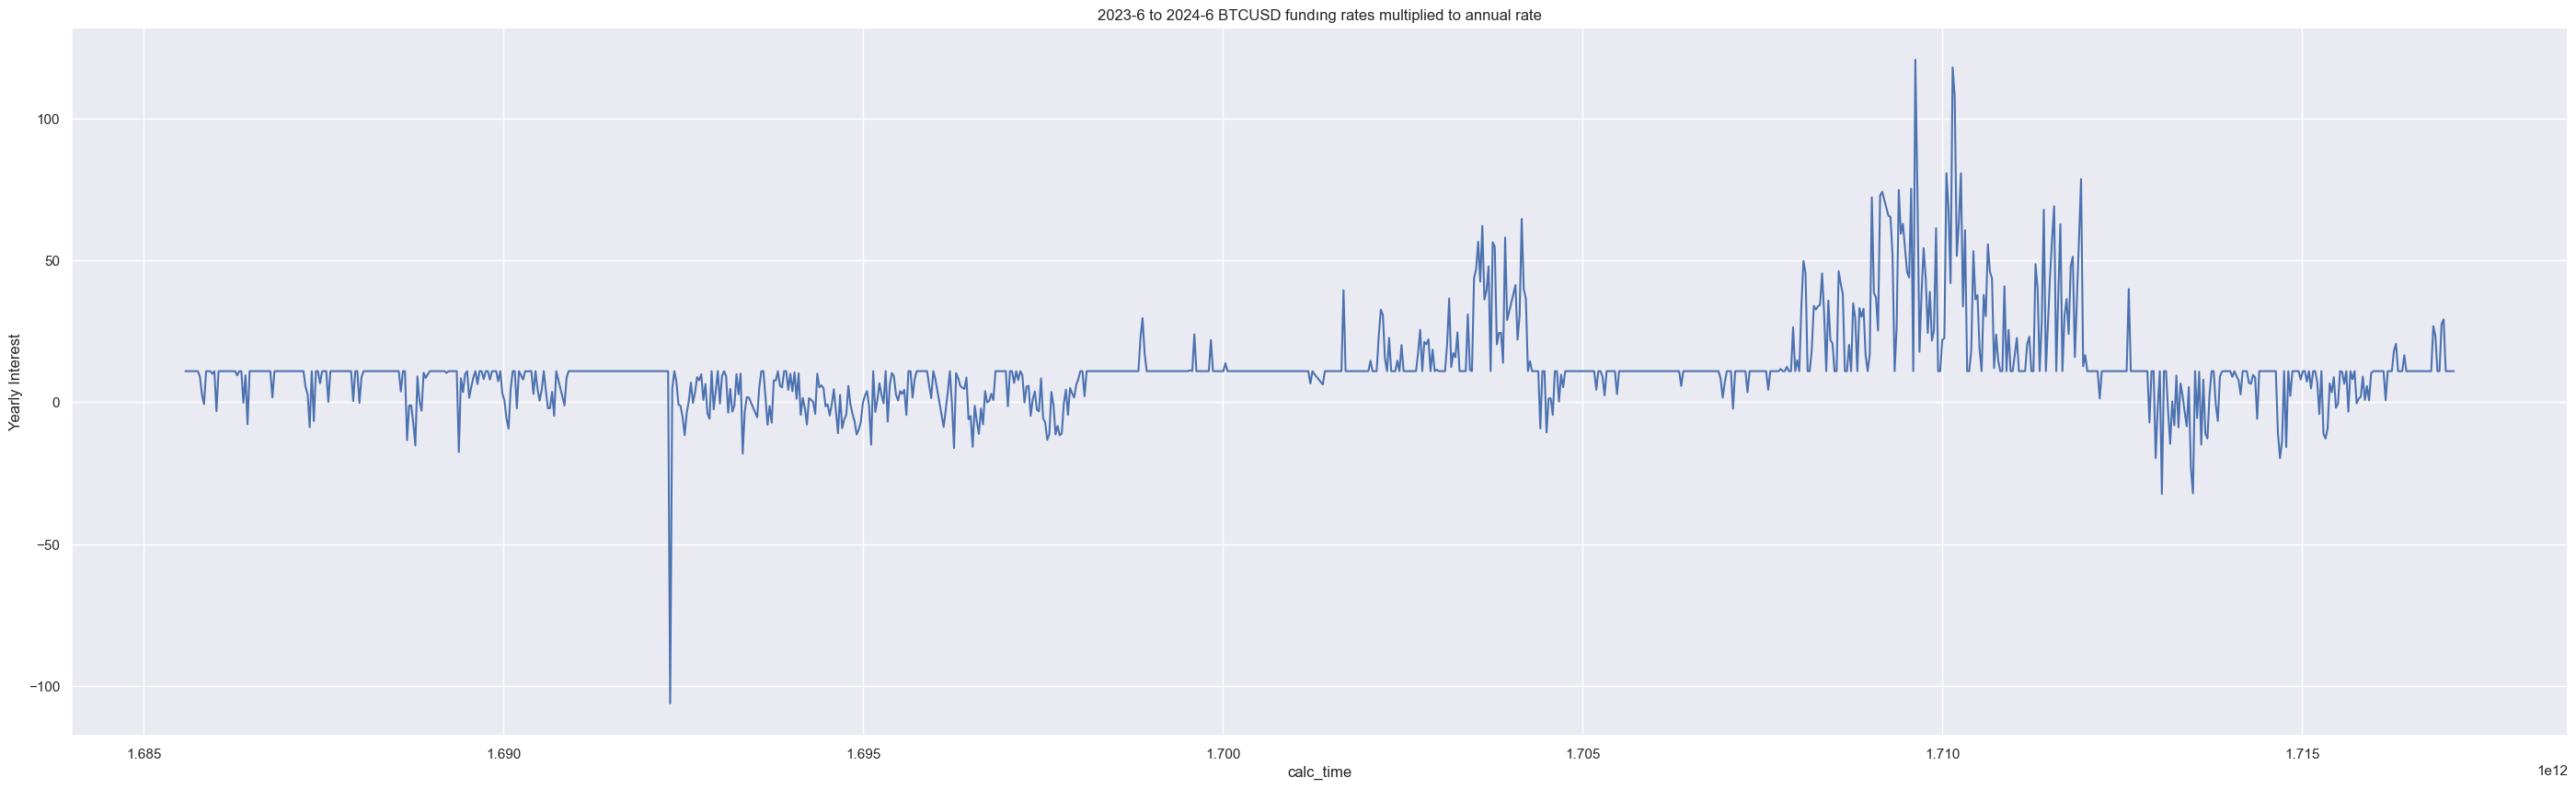

In [44]:
(sns.lineplot(data=funding_rate_data, x="calc_time", y="Yearly Interest")
 .set(title = f"2023-6 to 2024-6 {symbol} fundıng rates multiplied to annual rate"))

[Text(0.5, 1.0, '2023-6 to 2024-6 BTCUSD cumulatıve interest paid as funding fee')]

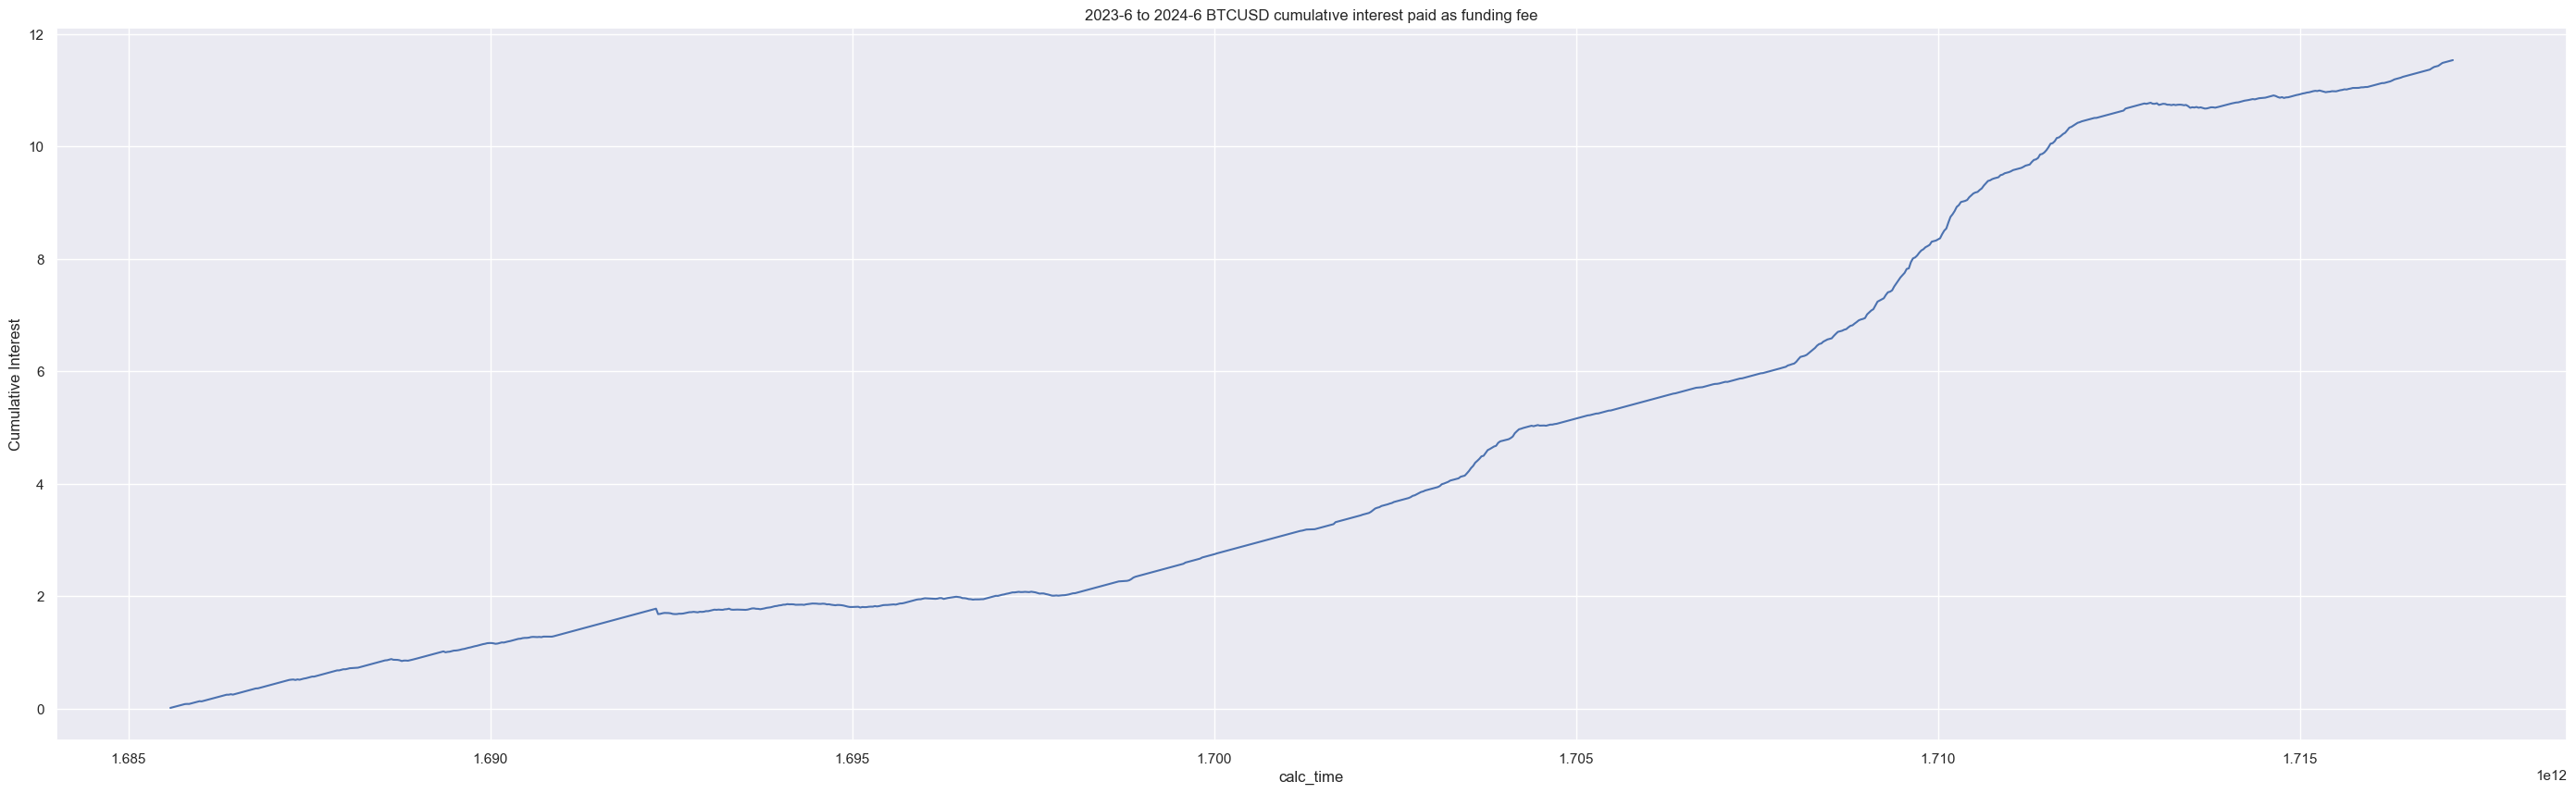

In [45]:
(sns.lineplot(data=funding_rate_data, x="calc_time", y="Cumulative Interest")
.set(title = f"2023-6 to 2024-6 {symbol} cumulatıve interest paid as funding fee"))

<Axes: title={'center': 'minutely high prices for BTCUSD_240329 between beginning and end of contract'}, xlabel='open_time', ylabel='high'>

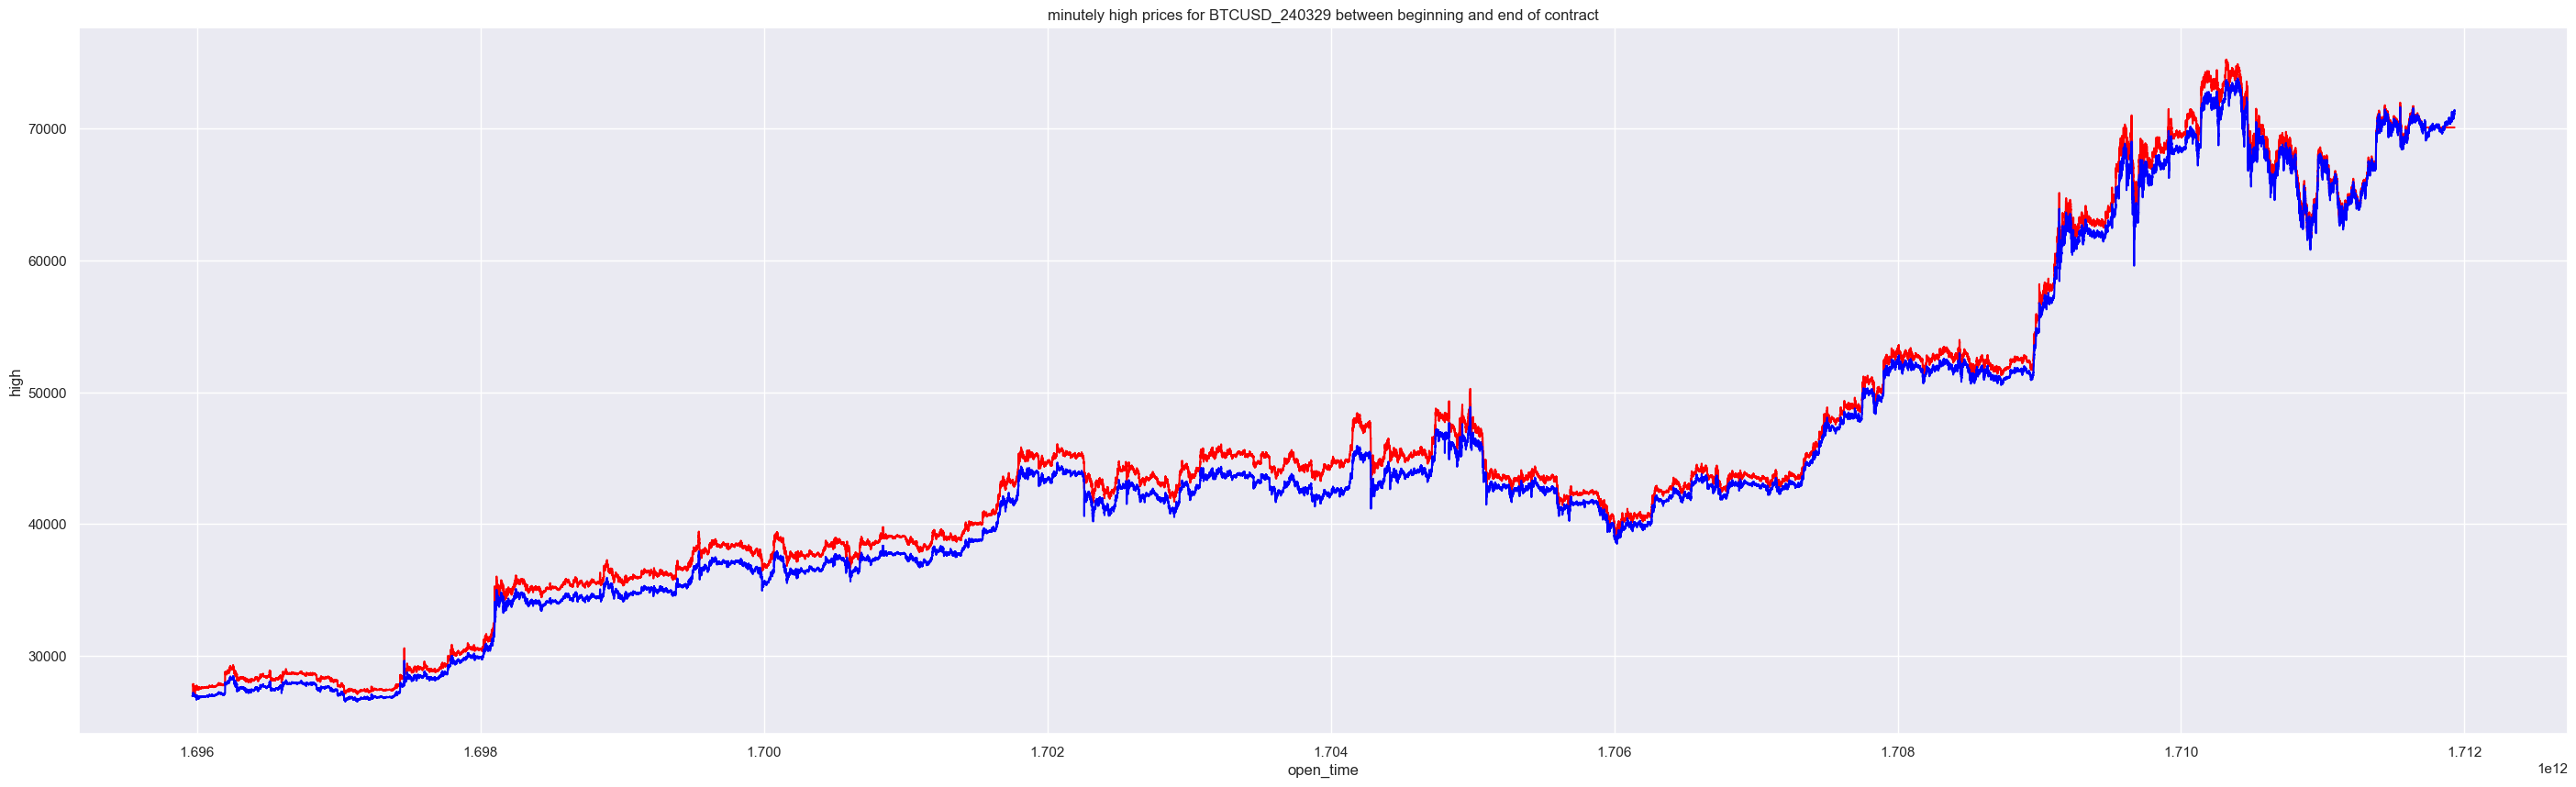

In [46]:
delivery_date = delivery_dates[0]
(sns.lineplot(data= delivery_data[delivery_date], x="open_time", y = "high", color= "red")
 .set(title = f"minutely high prices for {symbol}_{delivery_date} between beginning and end of contract"))

open_time_min = min(delivery_data[delivery_date]["open_time"])
open_time_max = max(delivery_data[delivery_date]["open_time"])
perp_data = perpetual_data[perpetual_data["open_time"] >= open_time_min]
perp_data = perp_data[perp_data["open_time"] <= open_time_max]
(sns.lineplot(data= perp_data, x="open_time", y = "low", color= "blue"))

In [47]:
delivery_date = delivery_dates[0]

open_time_min = min(delivery_data[delivery_date]["open_time"])
open_time_max = max(delivery_data[delivery_date]["open_time"])
perp_data = perpetual_data[perpetual_data["open_time"] >= open_time_min]
perp_data = perp_data[perp_data["open_time"] <= open_time_max]

open_time_points_risk = []
percentage_difference_risk = []
open_time_points_profit = []
percentage_difference_profit = []
for i in range(len(delivery_data[delivery_date]["open_time"])):
    if(delivery_data[delivery_date].iloc[i]["open_time"] != perp_data.iloc[i]["open_time"]):
        raise Exception
    del_high = delivery_data[delivery_date].iloc[i]["high"]
    perp_low = perp_data.iloc[i]["low"]
    open_time_points_risk.append(perp_data.iloc[i]["open_time"])
    percentage_difference_risk.append((del_high-perp_low)/perp_low*100)
    
    del_open = delivery_data[delivery_date].iloc[i]["open"]
    del_close = delivery_data[delivery_date].iloc[i]["close"]
    perp_open = perp_data.iloc[i]["open"]
    perp_close = perp_data.iloc[i]["close"]
    rate1 = (del_open - perp_open)/perp_open*100
    rate2 = (del_close - perp_close)/perp_close*100
    max_profit = max(rate1,rate2)
    open_time_points_profit.append(perp_data.iloc[i]["open_time"])
    percentage_difference_profit.append(max_profit)

data_risk = {"time":open_time_points_risk, "max_difference":percentage_difference_risk}
risk_diff_df  = pd.DataFrame(data = data_risk)

data_profit = {"time":open_time_points_profit, "max_difference":percentage_difference_profit}
profit_diff_df = pd.DataFrame(data = data_profit)


[Text(0.5, 1.0, 'minutely max price difference for BTCUSD_240329 between beginning and end of contract')]

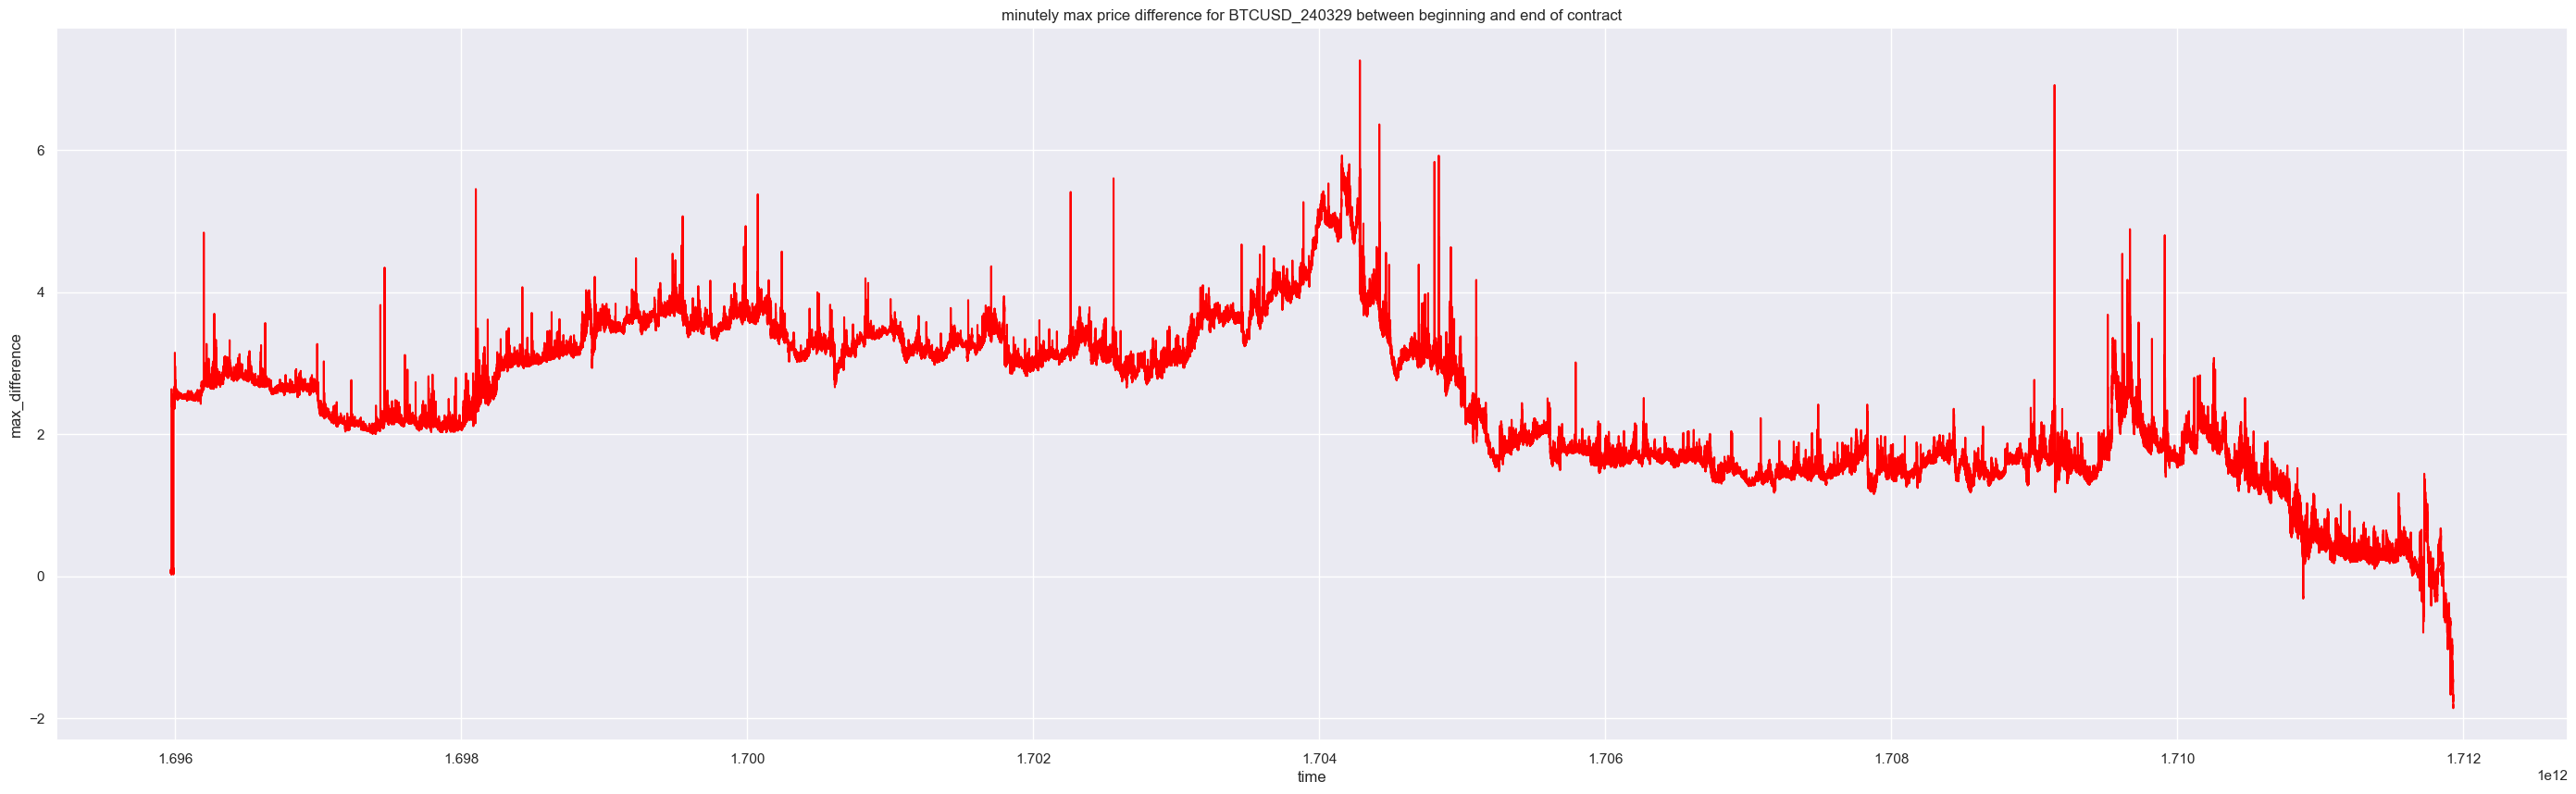

In [48]:
(sns.lineplot(data= risk_diff_df, x="time", y = "max_difference", color= "red")
 .set(title = f"minutely max price difference for {symbol}_{delivery_date} between beginning and end of contract"))    

[Text(0.5, 1.0, 'minutely max price difference for BTCUSD_240329 between beginning and end of contract')]

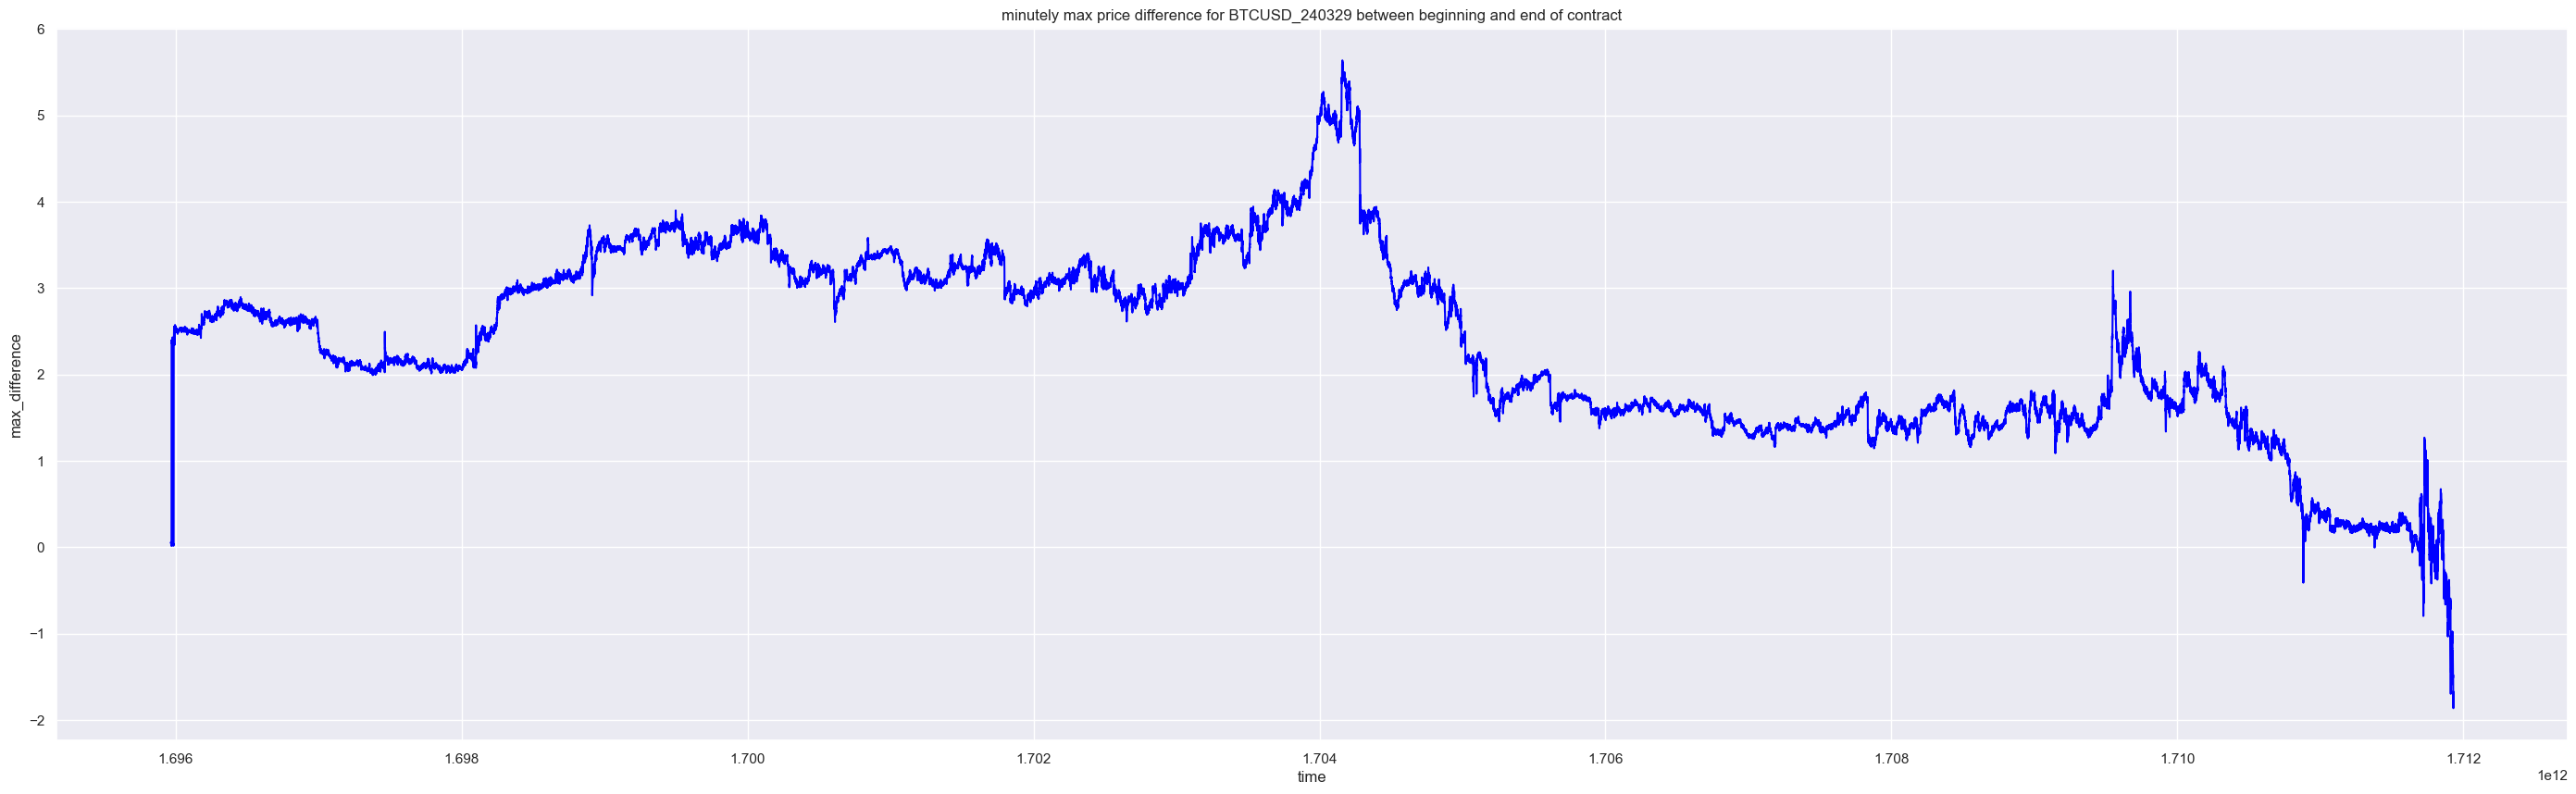

In [49]:
(sns.lineplot(data= profit_diff_df, x="time", y = "max_difference", color= "blue")
 .set(title = f"minutely max price difference for {symbol}_{delivery_date} between beginning and end of contract"))    